In [1]:
import numpy as np # Matrix and vector computation package
np.seterr(all='ignore') # ignore numpy warning like multiplication of inf
import matplotlib.pyplot as plt  # Plotting library
from matplotlib.colors import colorConverter, ListedColormap # some plotting functions
from matplotlib import cm # Colormaps
# plt.xkcd()
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
np.random.seed(seed=1)

### Define class distribution

In this example the target classes $t$ will be generated from 2 class distributions: blue ($t=1$) and red ($t=0$). Samples from both classes are sampled from their respective distributions. These samples are plotted in the figure below. Note that $X$ is a $N \times 2$ matrix of individual input samples $\mathbf{x}_i$, and that $\mathbf{t}$ is a corresponding $N \times 1$ vector of target values $t_i$.

#### Define and generate samples 

In [2]:
nb_of_samples_per_class = 20  # The number of sample in each class
red_mean = [-1,0]  # The mean of the red class
blue_mean = [1,0]  # The mean of the blue class
std_dev = 1.2  # standard deviation of both classes
# Generate samples from both classes
x_red = np.random.randn(nb_of_samples_per_class, 2) * std_dev + red_mean
x_blue = np.random.randn(nb_of_samples_per_class, 2) * std_dev + blue_mean

# Merge samples in set of input variables x, and corresponding set of output variables t
X = np.vstack((x_red, x_blue))
t = np.vstack((np.zeros((nb_of_samples_per_class,1)), np.ones((nb_of_samples_per_class,1))))

#### Plot both classes on x1, x2 plane 

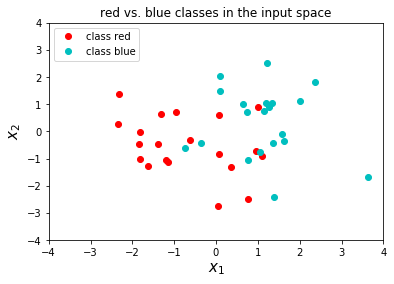

In [3]:
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='class red')
plt.plot(x_blue[:,0], x_blue[:,1], 'co', label='class blue')
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-4, 4, -4, 4])
plt.title('red vs. blue classes in the input space')
plt.show()

### Logistic function and cross-entropy function

#### Logistic Function

The goal is to predict the target class $t$ from the input values $x$. The network is defined as having an input $\mathbf{x} = [x_1, x_2]$ which gets transformed by the weights $\mathbf{w} = [w_1, w_2]$ to generate the probability that sample $\mathbf{x}$ belongs to class $t=1$. This probability $P(t=1| \mathbf{x},\mathbf{w})$ is represented by the output $y$ of the network computed as $y = \sigma(\mathbf{x} * \mathbf{w}^T)$. $\sigma$ is the logistic function and is defined as: $$ \sigma(z) = \frac{1}{1+e^{-z}} $$

This logistic function and its derivative are explained in another example.

The logistic function is implemented below by the logistic(z) method.

#### Cross-entropy function

The cost function used to optimize the classification is the cross-entropy error function. And is defined for sample $i$ as:

$$ \xi(t_i,y_i) = -t_i log(y_i) - (1-t_i)log(1-y_i) $$

Which will give $\xi(t,y) = - \sum_{i=1}^{n} \left[ t_i log(y_i) + (1-t_i)log(1-y_i) \right]$ if we sum over all $N$ samples.

The explanation and derivative of this cost function are given in detail. The cost function is implemented below by the cost(y, t) method, and its output with respect to the parameters $\mathbf{w}$ over all samples $\mathbf{x}$ is plotted in the figure below.

The neural network output is implemented by the nn(x, w) method, and the neural network prediction by the nn_predict(x,w) method.

In [4]:
# Define the logistic function
def logistic(z): 
    return 1 / (1 + np.exp(-z))

# Define the neural network function y = 1 / (1 + numpy.exp(-x*w))
def nn(x, w): 
    return logistic(x.dot(w.T))

# Define the neural network prediction function that only returns
#  1 or 0 depending on the predicted class
def nn_predict(x,w): 
    return np.around(nn(x,w))
    
# Define the cost function
def cost(y, t):
    return - np.sum(np.multiply(t, np.log(y)) + np.multiply((1-t), np.log(1-y)))

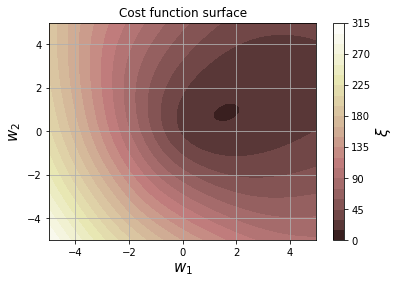

In [5]:
# Plot the cost in function of the weights
# Define a vector of weights for which we want to plot the cost
nb_of_ws = 100 # compute the cost nb_of_ws times in each dimension
ws1 = np.linspace(-5, 5, num=nb_of_ws) # weight 1
ws2 = np.linspace(-5, 5, num=nb_of_ws) # weight 2
ws_x, ws_y = np.meshgrid(ws1, ws2) # generate grid
cost_ws = np.zeros((nb_of_ws, nb_of_ws)) # initialize cost matrix
# Fill the cost matrix for each combination of weights
for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        cost_ws[i,j] = cost(nn(X, np.asmatrix([ws_x[i,j], ws_y[i,j]])) , t)
# Plot the cost function surface
plt.contourf(ws_x, ws_y, cost_ws, 20, cmap=cm.pink)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\\xi$', fontsize=15)
plt.xlabel('$w_1$', fontsize=15)
plt.ylabel('$w_2$', fontsize=15)
plt.title('Cost function surface')
plt.grid()
plt.show()

## Gradient Descent Optimization of the cost function

The [gradient descent](http://en.wikipedia.org/wiki/Gradient_descent) algorithm works by taking the derivative of the cost function $\xi$ with respect to the parameters, and updates the parameters in the direction of the negative gradient.

The parameters $\mathbf{w}$ are updated by taking steps proportional to the negative of the gradient: $\mathbf{w}(k+1) = \mathbf{w}(k) - \Delta \mathbf{w}(k+1)$. $\Delta \mathbf{w}$ is defined as: $\Delta \mathbf{w} = \mu \frac{\partial \xi}{\partial \mathbf{w}}$ with $\mu$ the learning rate.

${\partial \xi_i}/{\partial \mathbf{w}}$, for each sample $i$ is computed as follows:

$$\frac{\partial \xi_i}{\partial \mathbf{w}} = \frac{\partial z_i}{\partial \mathbf{w}} \frac{\partial y_i}{\partial z_i} \frac{\partial \xi_i}{\partial y_i}$$

Where $y_i = \sigma(z_i)$ is the output of the logistic neuron, and $z_i = \mathbf{x}_i * \mathbf{w}^T$ the input to the logistic neuron.

The [Logistic and Softmax tutorials](https://github.com/TarrySingh/Artificial-Intelligence-Deep-Learning-Machine-Learning-Tutorials/blob/master/deep-learning/Logistic%20%26%20Softmax%20Function%20in%20Neural%20Networks.ipynb) derived that ${\partial \xi_i}/{\partial y_i}$ can be calculated as:

$$\frac{\partial \xi_i}{\partial y_i} = \frac{y_i - t_i}{y_i (1 - y_i)}$$

and that ${\partial y_i}/{\partial z_i}$ can be calculated as:

$$\frac{\partial y_i}{\partial z_i} = y_i (1 - y_i)$$

${\partial z_i}/{\partial \mathbf{w}}$ can be calculated as:

$$\frac{\partial z}{\partial \mathbf{w}} = \frac{\partial (\mathbf{x} * \mathbf{w})}{\partial \mathbf{w}} = \mathbf{x} $$

Bringing this together we can write:

$$\frac{\partial \xi_i}{\partial \mathbf{w}} = \frac{\partial z_i}{\partial \mathbf{w}} \frac{\partial y_i}{\partial z_i} \frac{\partial \xi_i}{\partial y_i} = \mathbf{x} * y_i (1 - y_i) * \frac{y_i - t_i}{y_i (1-y_i)} = \mathbf{x} * (y_i-t_i) $$

Notice how this gradient is the same (negating the constant factor) as the gradient of the squared error regression.

So the full update function $\Delta w_j$ for each weight will become

$$\Delta w_j = \mu * \frac{\partial \xi_i}{\partial w_j} = \mu * x_j * (y_i-t_i)$$

In the batch processing, we just add up all the gradients for each sample:

$$\Delta w_j = \mu * \sum_{i=1}^{N} x_{ij} (y_i - t_i)$$

To start out the gradient descent algorithm, you typically start with picking the initial parameters at random and start updating these parameters according to the delta rule with $\Delta w$ until convergence.



The gradient ${\partial \xi}/{\partial \mathbf{w}}$ is implemented by the gradient(w, x, t) function. $\Delta \mathbf{w}$ is computed by the delta_w(w_k, x, t, learning_rate).

In [6]:
# define the gradient function.
def gradient(w, x, t): 
    return (nn(x, w) - t).T * x

# define the update function delta w which returns the 
#  delta w for each weight in a vector
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t)


### Gradient descent updates

Gradient descent is run on the example inputs $X$ and targets $\mathbf{t}$ for 10 iterations. The first 3 iterations are shown in the figure below. The blue dots represent the weight parameter values $\mathbf{w}(k)$ at iteration $k$.

In [7]:
# Set the initial weight parameter
w = np.asmatrix([-4, -2])
# Set the learning rate
learning_rate = 0.05

# Start the gradient descent updates and plot the iterations
nb_of_iterations = 10  # Number of gradient descent updates
w_iter = [w]  # List to store the weight values over the iterations
for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate)  # Get the delta w update
    w = w-dw  # Update the weights
    w_iter.append(w)  # Store the weights for plotting

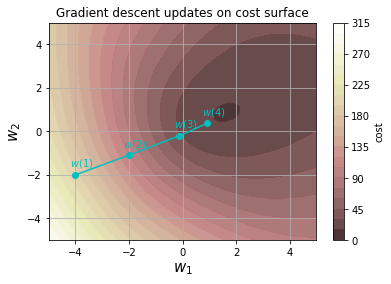

In [11]:
# Plot the first weight updates on the error surface
# Plot the error surface
plt.contourf(ws_x, ws_y, cost_ws, 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
cbar.ax.set_ylabel('cost')

# Plot the updates
for i in range(1, 4): 
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    # Plot the weight-cost value and the line that represents the update
    plt.plot(w1[0,0], w1[0,1], 'co')  # Plot the weight cost value
    plt.plot([w1[0,0], w2[0,0]], [w1[0,1], w2[0,1]], 'c-')
    plt.text(w1[0,0]-0.2, w1[0,1]+0.4, '$w({})$'.format(i), color='c')
w1 = w_iter[3]  
# Plot the last weight
plt.plot(w1[0,0], w1[0,1], 'co')
plt.text(w1[0,0]-0.2, w1[0,1]+0.4, '$w({})$'.format(4), color='c') 
# Show figure
plt.xlabel('$w_1$', fontsize=15)
plt.ylabel('$w_2$', fontsize=15)
plt.title('Gradient descent updates on cost surface')
plt.grid()
plt.show()

### Visialization of the trained classifier

The resulting decision boundary of running gradient descent on the example inputs $X$ and targets $\mathbf{t}$ is shown in the figure below. The background color refers to the classification decision of the trained classifier. Note that since this decision plane is linear that not all examples can be classified correctly. Two blue dots will be misclassified as red, and four red spots will be misclassified as <font color='blue'>blue</font>.

Note that the decision boundary goes through the point $(0,0)$ since we don't have a bias parameter on the logistic output unit.

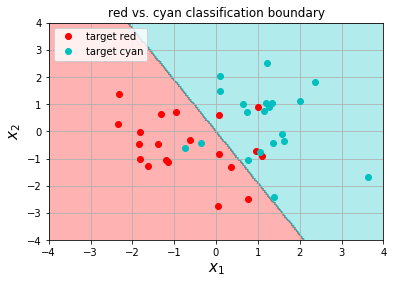

In [13]:
# Plot the resulting decision boundary
# Generate a grid over the input space to plot the color of the
#  classification at that grid point
nb_of_xs = 200
xs1 = np.linspace(-4, 4, num=nb_of_xs)
xs2 = np.linspace(-4, 4, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i,j] = nn_predict(np.asmatrix([xx[i,j], yy[i,j]]) , w)
# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('c', alpha=0.30)])

# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='target red')
plt.plot(x_blue[:,0], x_blue[:,1], 'co', label='target cyan')
plt.grid()
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.title('red vs. cyan classification boundary')
plt.show()
